In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# 데이터 불러오기
import os
current_path = os.getcwd()

rainday = pd.read_csv('scenario_45.csv', index_col = 0)
rainday.head(5)

,k_lst,r_lst
1,2021.1.5,0.001999
2,2021.1.27,0.001780
3,2021.2.2,0.006986
4,2021.2.19,0.055546
5,2021.2.22,0.100801


In [4]:
# 따릉이 데이터 불러오기
train_bike = pd.read_csv('traindata.csv', index_col = 0)
test_bike = pd.read_csv('testdata.csv', index_col = 0);test_bike

,광진구,동대문구,성동구,중랑구
date,,,,
2021-01-01,2.070,1.650,1.676,1.222
2021-01-02,2.062,1.906,1.822,1.440
2021-01-03,1.918,1.854,1.810,1.278
2021-01-04,3.238,2.716,2.934,1.710
2021-01-05,2.864,2.372,2.526,1.530
...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350
2021-12-28,4.510,3.890,3.714,2.700
2021-12-29,4.490,3.524,3.660,2.524


In [5]:
import datetime as dt

from prophet import Prophet

# base model (아무런 옵션 없이)
# prophet모형에 적합시키기 위해 데이터프레임의 형태를 변경하려 한다.
train_bike = train_bike.reset_index()
train_bike.rename(columns = {'date' : 'ds'}, inplace=True)

train_bike_1 = train_bike[['광진구', 'ds']]
train_bike_2 = train_bike[['동대문구', 'ds']]
train_bike_3 = train_bike[['성동구', 'ds']]
train_bike_4 = train_bike[['중랑구', 'ds']]

train_bike_1.rename(columns = {'광진구' : 'y'}, inplace=True)
train_bike_2.rename(columns = {'동대문구' : 'y'}, inplace=True)
train_bike_3.rename(columns = {'성동구' : 'y'}, inplace=True)
train_bike_4.rename(columns = {'중랑구' : 'y'}, inplace=True)





<ipython-input-5-737d808da2f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bike_1.rename(columns = {'광진구' : 'y'}, inplace=True)
<ipython-input-5-737d808da2f5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bike_2.rename(columns = {'동대문구' : 'y'}, inplace=True)
<ipython-input-5-737d808da2f5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bike_3.rename(columns = {'성동구' : 'y'}, inplace=True)
<ipython-input-5-7

In [86]:
# prophet 모델에 적합시키기
m = Prophet()
m.fit(train_bike_1)

future = m.make_future_dataframe(periods=365)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/fsa5z6q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/90damkbp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3427', 'data', 'file=/tmp/tmpz3x1fdr_/fsa5z6q_.json', 'init=/tmp/tmpz3x1fdr_/90damkbp.json', 'output', 'file=/tmp/tmpz3x1fdr_/prophet_models5nz1kly/prophet_model-20230520035941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
1456,2021-12-27
1457,2021-12-28
1458,2021-12-29
1459,2021-12-30
1460,2021-12-31


In [87]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2021-12-27,2.249526,-0.106295,4.702434
1457,2021-12-28,2.451517,-0.048388,4.745093
1458,2021-12-29,2.277082,-0.082670,4.751450
1459,2021-12-30,2.306255,-0.199020,4.777370
1460,2021-12-31,2.490507,0.111899,4.835812


In [88]:
mse(test_bike_1, forecast['yhat'].tail(365))

11.28663701678173

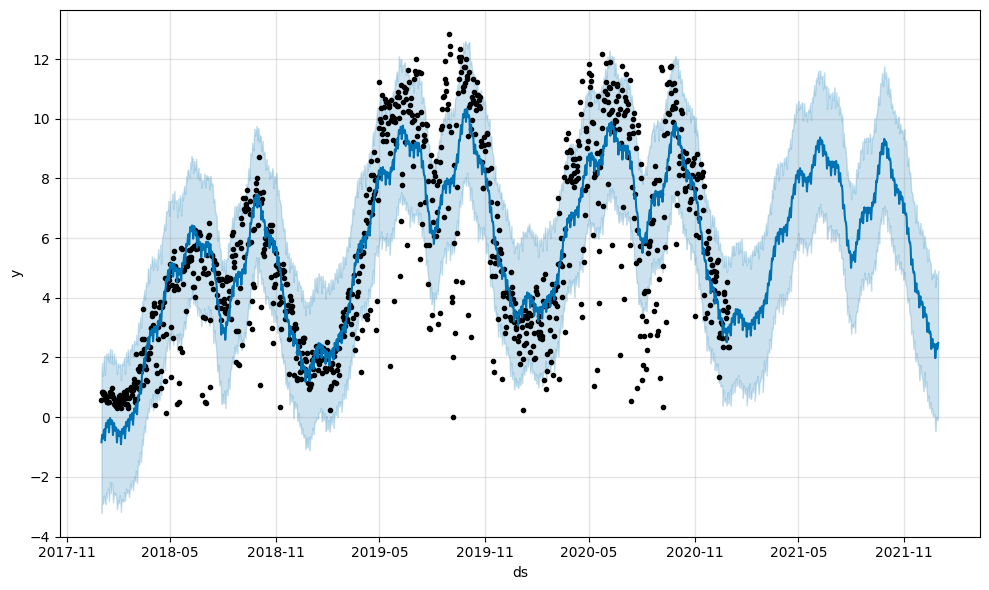

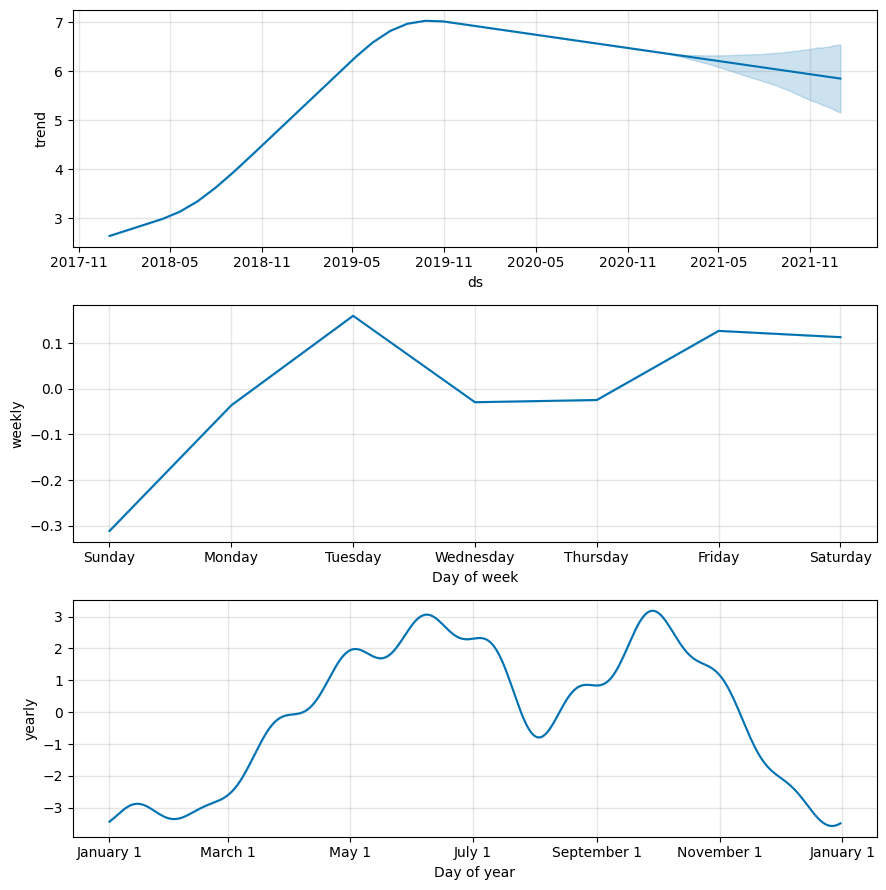

In [8]:
# plot 
fig1 = m.plot(forecast)

# 각 요인의 추세 확인
fig2 = m.plot_components(forecast)



In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)

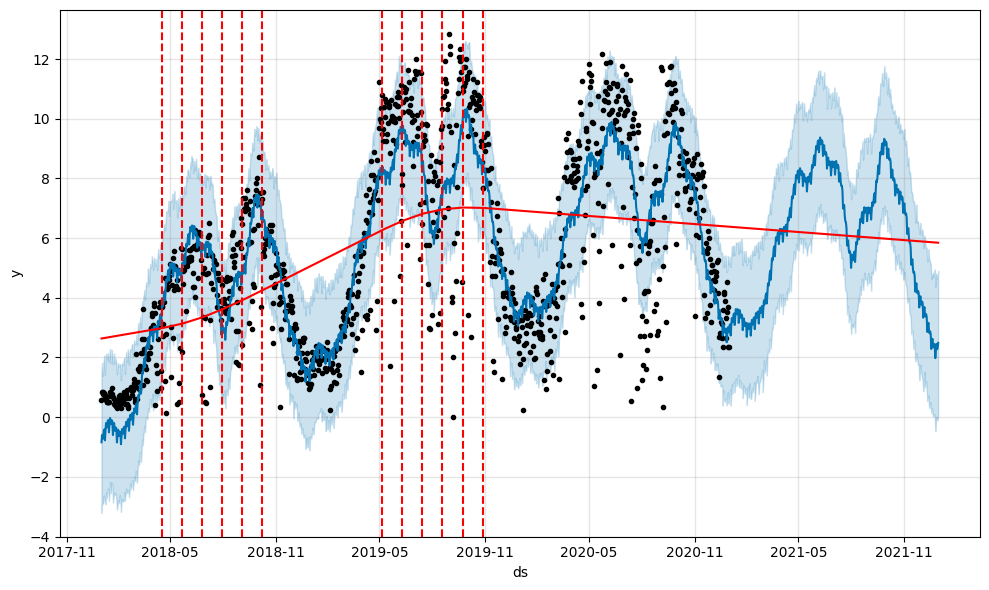

In [11]:
# 변화점 detect
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/4r4hth67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/_swdjci0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9996', 'data', 'file=/tmp/tmpz3x1fdr_/4r4hth67.json', 'init=/tmp/tmpz3x1fdr_/_swdjci0.json', 'output', 'file=/tmp/tmpz3x1fdr_/prophet_model5wbhny9u/prophet_model-20230520025903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:59:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:59:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


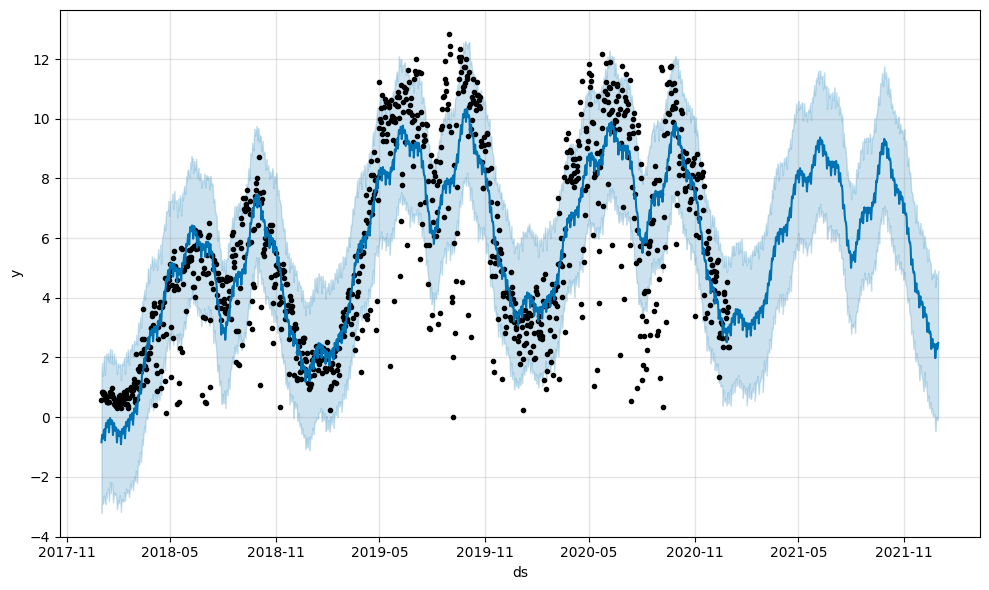

In [13]:
# trend 유연성 변경
m = Prophet(changepoint_prior_scale=0.7) # default 0.5
forcast = m.fit(train_bike_1).predict(future)
fig = m.plot(forecast)

In [48]:
ind =  ['2021.01.5', '2021.01.27', '2021.02.2', '2021.02.19', '2021.02.22', '2021.03.04', '2021.03.11', '2021.03.18', '2021.04.02', '2021.04.14', '2021.04.16', '2021.04.17', '2021.04.30', '2021.05.10', '2021.05.15', '2021.05.17', '2021.05.20', '2021.05.23', '2021.06.01', '2021.06.23', '2021.06.25', '2021.06.29', '2021.07.04', '2021.07.08', '2021.07.13', '2021.07.17', '2021.07.19', '2021.07.20', '2021.07.22', '2021.07.28', '2021.07.29', '2021.08.06', '2021.08.07', '2021.08.08', '2021.08.10', '2021.08.11', '2021.08.13', '2021.08.15', '2021.08.17', '2021.08.24', '2021.08.27', '2021.08.29', '2021.09.05', '2021.09.07', '2021.09.08', '2021.09.11', '2021.09.20', '2021.10.08', '2021.10.23', '2021.11.01', '2021.11.02', '2021.11.05', '2021.11.14', '2021.12.10', '2021.12.18']
rainday['k_lst'] = ind
rainday['k_lst'] = pd.to_datetime(rainday['k_lst'], format='%Y.%m.%d')
rainday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   k_lst   55 non-null     datetime64[ns]
 1   r_lst   55 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [21]:
# 휴일효과나 그 외의 특별한 사건 반영
rainoffs = pd.DataFrame({
    'holiday' : 'rainoff',
    'ds' : rainday['k_lst'],
    'lower_window' : 0,
    'upper_window' : 1
})

superbowls

ValueError: ignored

<Axes: >

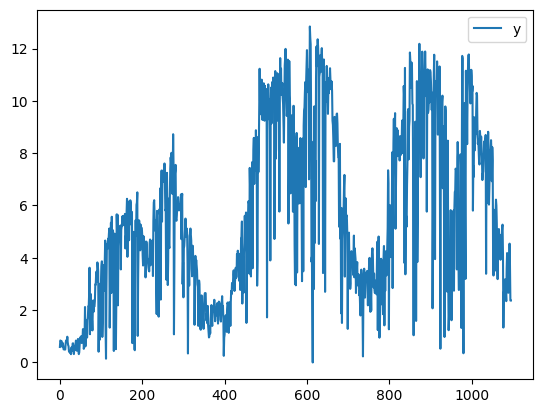

In [50]:
# ARIMA 모형
train_bike_1.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



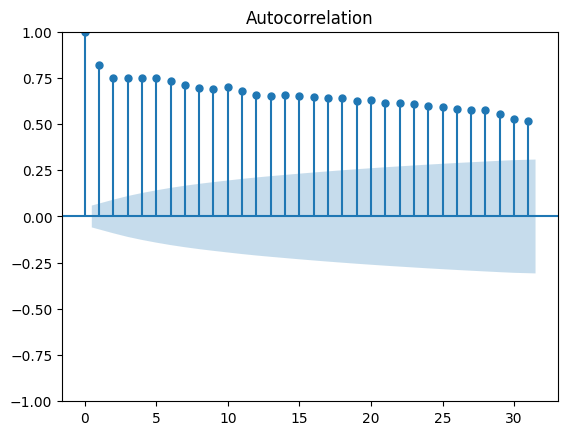

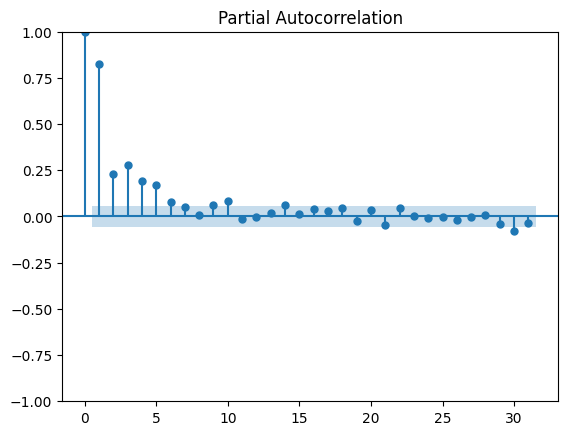

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_bike_1['y'])
plot_pacf(train_bike_1['y'])
plt.show()

In [54]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error as mse

import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [55]:
import seaborn as sns
auto_arima_model = pm.auto_arima(train_bike_1['y'], seasonal = True, m=1)

fcast2 = auto_arima_model.predict(365)
fcast2 = pd.Series(fcast2)
fcast2 = fcast2.rename('Auto Arima')



In [56]:
print(auto_arima_model)

 ARIMA(0,1,2)(0,0,0)[0]          


<Axes: >

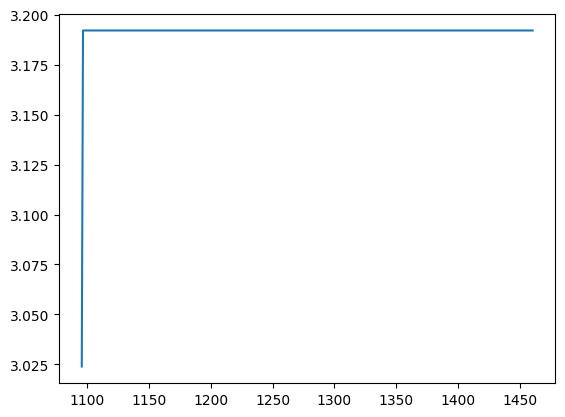

In [58]:
fcast2.plot()

In [61]:
rainday = rainday[['k_lst']]
rainday.rename(columns = {'k_lst' : 'ds'}, inplace = True)

In [92]:


m = Prophet( 
                  
                  # holiday
                  holidays=rainday,
                  holidays_prior_scale=20.0,
                  interval_width = 0.95
                  )

m = m.fit(train_bike_1)
forecast = m.make_future_dataframe(periods = 365)
pred_prophet = m.predict(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/t4e8v1ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/wsltw804.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20779', 'data', 'file=/tmp/tmpz3x1fdr_/t4e8v1ig.json', 'init=/tmp/tmpz3x1fdr_/wsltw804.json', 'output', 'file=/tmp/tmpz3x1fdr_/prophet_modely9w14at9/prophet_model-20230520042230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


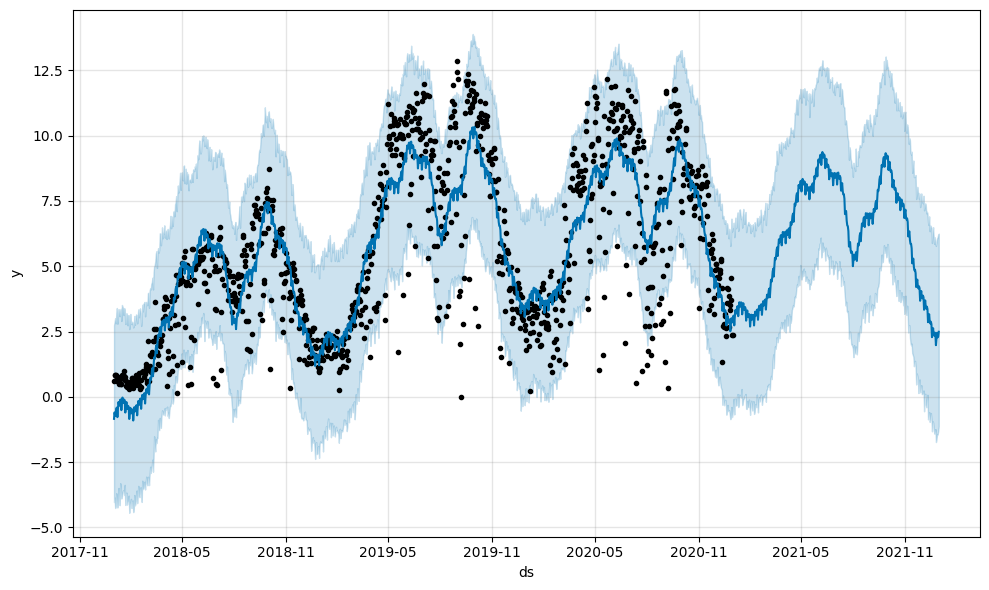

In [93]:
fig3 = m.plot(pred_prophet)

In [83]:
test_bike_1 = test_bike['광진구']

In [85]:
mse(test_bike_1,pred_prophet['yhat'].tail(365))

11.28663701678173

In [90]:
mse(test_bike_1, forecast['yhat'].tail(365))

11.28663701678173

In [95]:
pred_prophet['yhat']

0      -0.841517
1      -0.594626
2      -0.729370
3      -0.666494
4      -0.455154
          ...   
1456    2.249526
1457    2.451517
1458    2.277082
1459    2.306255
1460    2.490507
Name: yhat, Length: 1461, dtype: float64

In [96]:
rain_1 = pd.read_csv('peak_2018.csv')
rain_2 = pd.read_csv('peak_2019.csv')
rain_3 = pd.read_csv('peak_2020.csv')

In [100]:
sumdf = pd.concat([rain_1, rain_2, rain_3]).dropna()

In [104]:
sumdf

,date,temp,rain,humid,snow
0,2018-01-01,-0.292308,0.000000,34.461538,0.0
1,2018-01-02,-0.638462,0.000000,40.846154,0.0
2,2018-01-03,-3.930769,0.000000,37.615385,0.0
3,2018-01-04,-4.307692,0.000000,40.076923,0.0
4,2018-01-05,-1.715385,0.000000,45.230769,0.0
...,...,...,...,...,...
361,2020-12-27,6.484615,0.000000,61.384615,0.0
362,2020-12-28,7.846154,0.000000,70.538462,0.0
363,2020-12-29,1.807692,0.015385,76.615385,0.0
364,2020-12-30,-10.538462,0.000000,52.461538,0.0


In [107]:
ds = sumdf.query('rain >= 1')['date']

In [108]:
event_df = pd.DataFrame(ds)
event_df['holiday'] = 'rain'

In [110]:
event_df.columns = ['ds', 'holiday']

In [113]:
event_df['ds'] = pd.to_datetime(event_df['ds'])

In [118]:


m = Prophet( 
                  
                  # holiday
                  holidays=event_df,
                  holidays_prior_scale=10.0,
                  interval_width = 0.95
                  )

m = m.fit(train_bike_1)
forecast = m.make_future_dataframe(periods = 365)
pred_prophet = m.predict(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/ozfe_tcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3x1fdr_/iqb_8od5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94903', 'data', 'file=/tmp/tmpz3x1fdr_/ozfe_tcw.json', 'init=/tmp/tmpz3x1fdr_/iqb_8od5.json', 'output', 'file=/tmp/tmpz3x1fdr_/prophet_modelsu9be5cg/prophet_model-20230520044313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:43:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [119]:
mse(test_bike_1, pred_prophet['yhat'].tail(365))

9.93773750347259

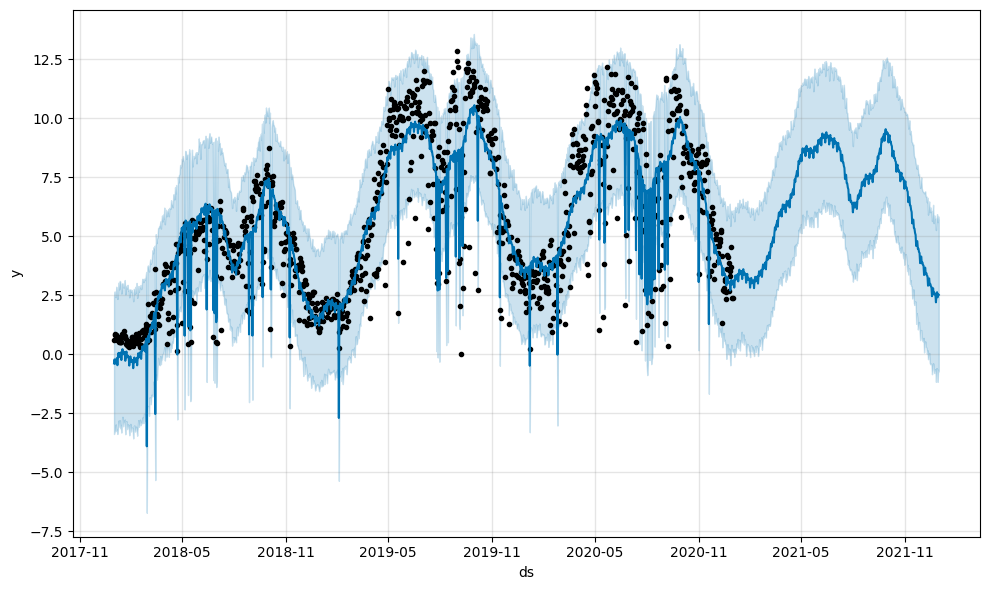

In [120]:
fig3 = m.plot(pred_prophet)